In [2]:
from pathlib import Path
import sys
sys.path.append('/Users/tam/Documents/thesis/thesis_rl/src')

import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta

from gym_trading.utils.data_pipeline import DataPipeline


datapipeline = DataPipeline(None)

/Users/tam/miniconda3/envs/thesis/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[2023-07-02 18:16:00,906, ema.py:65] EMA smoothing DISABLED


In [3]:
start_date = dt(2020,1,1) #of fitting, ie training starts on one day later
num_days = 2

paths = ['XBTUSD_' + (start_date+timedelta(i)).strftime("%Y-%m-%d") + '.csv.xz' 
         for i in range(num_days+1)]

normalized_dfs = pd.DataFrame()
raw_midpoints = pd.DataFrame()
for i in range(num_days):
    raw_midpoint, raw_data, normalized_data = \
        datapipeline.load_environment_data(
            fitting_file=paths[i],#'XBTUSD_2020-01-02.csv.xz',
            testing_file=paths[i+1],#'XBTUSD_2020-01-03.csv.xz',
            include_imbalances=False,
            as_pandas=True
        )
    
    normalized_dfs = pd.concat([normalized_dfs, normalized_data])
    raw_midpoints = pd.concat([raw_midpoints, raw_midpoint])
normalized_dfs = pd.concat([normalized_dfs, raw_midpoints], axis=1)
normalized_dfs = normalized_dfs.rename(columns={normalized_dfs.columns[-1]: 'raw_midpoints'})

[2023-07-02 18:16:07,136, data_pipeline.py:49] Imported /XBTUSD_2020-01-01.csv.xz from a csv in 2 seconds
[2023-07-02 18:16:09,643, data_pipeline.py:49] Imported /XBTUSD_2020-01-02.csv.xz from a csv in 2 seconds
[2023-07-02 18:16:12,223, data_pipeline.py:49] Imported /XBTUSD_2020-01-02.csv.xz from a csv in 2 seconds
[2023-07-02 18:16:14,809, data_pipeline.py:49] Imported /XBTUSD_2020-01-03.csv.xz from a csv in 2 seconds


In [6]:
raw_data.columns

Index(['midpoint', 'spread', 'buys', 'sells', 'bids_distance_0',
       'bids_distance_1', 'bids_distance_2', 'bids_distance_3',
       'bids_distance_4', 'bids_distance_5',
       ...
       'asks_market_notional_10', 'asks_market_notional_11',
       'asks_market_notional_12', 'asks_market_notional_13',
       'asks_market_notional_14', 'asks_market_notional_15',
       'asks_market_notional_16', 'asks_market_notional_17',
       'asks_market_notional_18', 'asks_market_notional_19'],
      dtype='object', length=204)

In [15]:
(raw_data['midpoint']-raw_data['spread']/2)[:10], (raw_data['midpoint']+raw_data['spread']/2)[:10]

(2020-01-03 00:00:00.450000+01:00    6951.5
 2020-01-03 00:00:01.450000+01:00    6951.5
 2020-01-03 00:00:02.451000+01:00    6951.5
 2020-01-03 00:00:03.452000+01:00    6951.5
 2020-01-03 00:00:04.452000+01:00    6951.5
 2020-01-03 00:00:05.453000+01:00    6951.5
 2020-01-03 00:00:06.453000+01:00    6951.5
 2020-01-03 00:00:07.454000+01:00    6951.5
 2020-01-03 00:00:08.454000+01:00    6951.5
 2020-01-03 00:00:09.455000+01:00    6951.5
 dtype: float64,
 2020-01-03 00:00:00.450000+01:00    6952.0
 2020-01-03 00:00:01.450000+01:00    6952.0
 2020-01-03 00:00:02.451000+01:00    6952.0
 2020-01-03 00:00:03.452000+01:00    6952.0
 2020-01-03 00:00:04.452000+01:00    6952.0
 2020-01-03 00:00:05.453000+01:00    6952.0
 2020-01-03 00:00:06.453000+01:00    6952.0
 2020-01-03 00:00:07.454000+01:00    6952.0
 2020-01-03 00:00:08.454000+01:00    6952.0
 2020-01-03 00:00:09.455000+01:00    6952.0
 dtype: float64)

In [22]:
normalized_data

,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,bids_distance_4,bids_distance_5,...,ofi_ask_10,ofi_ask_11,ofi_ask_12,ofi_ask_13,ofi_ask_14,ofi_ask_15,ofi_ask_16,ofi_ask_17,ofi_ask_18,ofi_ask_19
2020-01-03 00:00:00.450000+01:00,0.007196,-0.024006,-0.118281,-0.117432,-0.049541,-0.138837,-0.143478,-0.160301,-0.209278,-0.255875,...,0.013670,0.016552,0.016427,0.011906,0.006663,0.004820,0.004811,0.005232,-0.001330,-0.003305
2020-01-03 00:00:01.450000+01:00,0.007196,-0.024006,-0.118281,-0.117432,-0.049541,-0.138837,-0.143478,-0.160301,-0.209278,-0.255875,...,0.013670,0.016552,0.016427,0.011906,0.006663,0.004820,0.004811,0.005232,-0.001330,-0.003305
2020-01-03 00:00:02.451000+01:00,0.007196,-0.024006,-0.118281,-0.117432,-0.049541,-0.138837,-0.143478,-0.160301,-0.209278,-0.255875,...,0.013670,0.016552,0.016427,0.011906,0.006663,0.004820,0.004811,0.005232,-0.001330,-0.003305
2020-01-03 00:00:03.452000+01:00,0.007196,-0.024006,-0.111254,0.652347,-0.049541,-0.138837,-0.143478,-0.160301,-0.209278,-0.255875,...,0.106429,-0.167465,-0.737365,-0.193005,0.008722,-0.364960,-0.493422,-2.161351,-2.008650,0.119868
2020-01-03 00:00:04.452000+01:00,0.007196,-0.024006,-0.118281,-0.117432,-0.049541,-0.138837,-0.143478,-0.160301,-0.209278,-0.255875,...,0.013670,-0.168526,0.016202,1.715971,0.006663,-2.646502,0.004811,0.005232,-0.001330,-0.003305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-03 23:59:55.682000+01:00,0.007196,-0.024006,-0.118281,-0.115595,0.143773,0.306796,0.297996,0.321790,0.403629,0.481210,...,0.800576,0.276029,0.340971,0.011906,0.006663,0.004820,0.089694,0.005232,-0.001330,-0.003305
2020-01-03 23:59:56.682000+01:00,0.007196,-0.024006,-0.118281,-0.106410,0.143773,0.306796,0.297996,0.321790,0.403629,0.481210,...,0.013670,0.017091,0.016427,0.011906,0.006663,-0.018220,-0.652325,0.005232,-0.001330,0.053366
2020-01-03 23:59:57.682000+01:00,0.007196,-0.024006,-0.118281,-0.116207,0.143773,0.306796,0.297996,0.321790,0.403629,0.481210,...,-0.070641,0.254328,0.313828,0.011906,0.006663,0.004820,0.004811,0.005232,-0.310560,-0.003305
2020-01-03 23:59:58.683000+01:00,0.007196,-0.024006,-0.110576,-0.117432,0.143773,0.306796,0.297996,0.321790,0.403629,0.481210,...,0.013670,0.046757,0.260712,-0.021375,0.006663,0.291109,0.276568,1.169867,-0.001330,-0.003305


In [14]:
helper_df = pd.DataFrame()
threshold = 0.00005
helper_df['MovingAvg_Inclusive'] = raw_midpoint.rolling(window=20, min_periods=20).mean()
helper_df['MovingAvg_Exclusive'] = raw_midpoint.shift(-20).rolling(window=20, min_periods=20).mean()
helper_df['PercentageChange'] = (helper_df['MovingAvg_Exclusive'] - helper_df['MovingAvg_Inclusive']) / helper_df['MovingAvg_Inclusive']
helper_df['Result'] = helper_df['PercentageChange'].apply(lambda x: 1 if x > threshold else (-1 if x < -threshold else 0))
result_series = pd.Series(helper_df.Result)

In [18]:
result_series.

2020-01-03 00:00:00.450000+01:00    0
2020-01-03 00:00:01.450000+01:00    0
2020-01-03 00:00:02.451000+01:00    0
2020-01-03 00:00:03.452000+01:00    0
2020-01-03 00:00:04.452000+01:00    0
                                   ..
2020-01-03 23:59:55.682000+01:00    0
2020-01-03 23:59:56.682000+01:00    0
2020-01-03 23:59:57.682000+01:00    0
2020-01-03 23:59:58.683000+01:00    0
2020-01-03 23:59:59.683000+01:00    0
Name: Result, Length: 86351, dtype: int64

<Axes: >

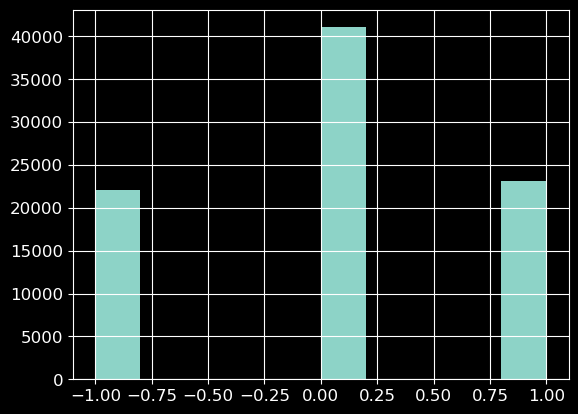

In [21]:
def calc_pred_labels(series: pd.Series, k: int = 20, threshold: float = 0.00005):
    helper_df = pd.DataFrame()
    helper_df['MA_incl'] = series.rolling(window=k, min_periods=k).mean()
    helper_df['MA_excl'] = series.shift(-k).rolling(window=k, min_periods=k).mean()
    helper_df['perc_change'] = (helper_df['MA_excl'] - helper_df['MA_incl']) / helper_df['MA_incl']
    helper_df['label'] = helper_df['perc_change'].apply(lambda x: 1 if x > threshold else (-1 if x < -threshold else 0))
    return pd.Series(helper_df['label'], dtype=float)
calc_pred_labels(raw_midpoint, k=20, threshold=0.00005).hist()

In [4]:
# Keep only 10 Levels of LOB
def filter_strings(strings):
    filtered_strings = []
    for string in strings:
        last_part = string.split('_')[-1]
        if ('ofi' in string) or (not last_part.isdigit() or int(last_part)>10):
            continue
        #print(string)
        filtered_strings.append(string)
    return filtered_strings

# calculate labels for predictions
def calculate_moving_average(df, k, threshold):
    # Calculate moving average including current value
    df['MovingAvg_Inclusive'] = df['raw_midpoints'].rolling(window=k, min_periods=k).mean()

    # Calculate moving average excluding current value but including future values
    df['MovingAvg_Exclusive'] = df['raw_midpoints'].shift(-k).rolling(window=k, min_periods=k).mean()

    # Calculate percentage change of lookahead moving average with respect to inclusive moving average
    df['PercentageChange'] = (df['MovingAvg_Exclusive'] - df['MovingAvg_Inclusive']) / df['MovingAvg_Inclusive']

    # Apply threshold conditions and add result column
    df['Result'] = df['PercentageChange'].apply(lambda x: 1 if x > threshold else (-1 if x < -threshold else 0))

    return df

#plot time series with changing backgroun colors depending on label
import matplotlib.pyplot as plt
import logging

logging.basicConfig(level='INFO')

mlogger = logging.getLogger('matplotlib')
mlogger.setLevel(logging.WARNING)


def plot_timeseries(df, y_col):
    # Set the figure size
    plt.figure(figsize=(15, 8))
    
    # Determine the background color for each label
    label_colors = {1: 'green', 0: 'white', -1: 'red'}
    
    # Plot the background color for each label
    for i in range(len(df)-1):
        label = df['Result'].iloc[i]
        color = label_colors[label]
        plt.axvspan(df.index[i], df.index[i+1], facecolor=color, alpha=0.2)
    
    # Plot the specified values on the y-axis
    plt.plot(df.index, df[y_col], 'b-', linewidth=1)
    
    # Set the x-axis label
    plt.xlabel('Time')
    
    # Set the y-axis label
    plt.ylabel(y_col)
    
    # Show the plot
    plt.show()

In [5]:
cols = normalized_dfs.columns
cols_red = filter_strings(cols)
cols_red += ['midpoint', 'spread', 'buys', 'sells', 'raw_midpoints']
normalized_dfs_red = normalized_dfs[cols_red]

normalized_dfs_red = calculate_moving_average(normalized_dfs_red, 20, 0.00005)

/var/folders/fl/_7zkqy_j7j73s6lx2yv46_nw0000gn/T/ipykernel_44492/1011492330.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MovingAvg_Inclusive'] = df['raw_midpoints'].rolling(window=k, min_periods=k).mean()
/var/folders/fl/_7zkqy_j7j73s6lx2yv46_nw0000gn/T/ipykernel_44492/1011492330.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MovingAvg_Exclusive'] = df['raw_midpoints'].shift(-k).rolling(window=k, min_periods=k).mean()
/var/folders/fl/_7zkqy_j7j73s6lx2yv46_nw0000gn/T/ipykernel_44492/101

<Axes: >

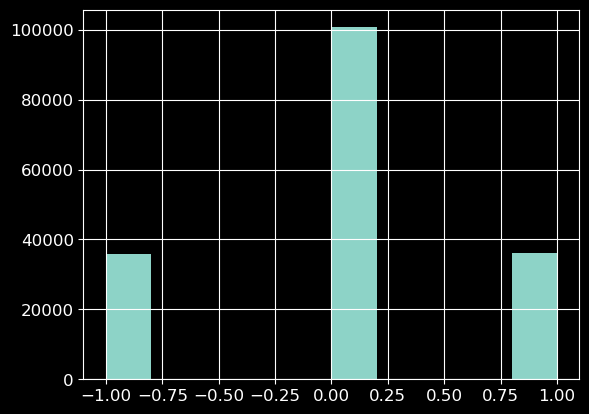

In [6]:
normalized_dfs_red.Result.hist()

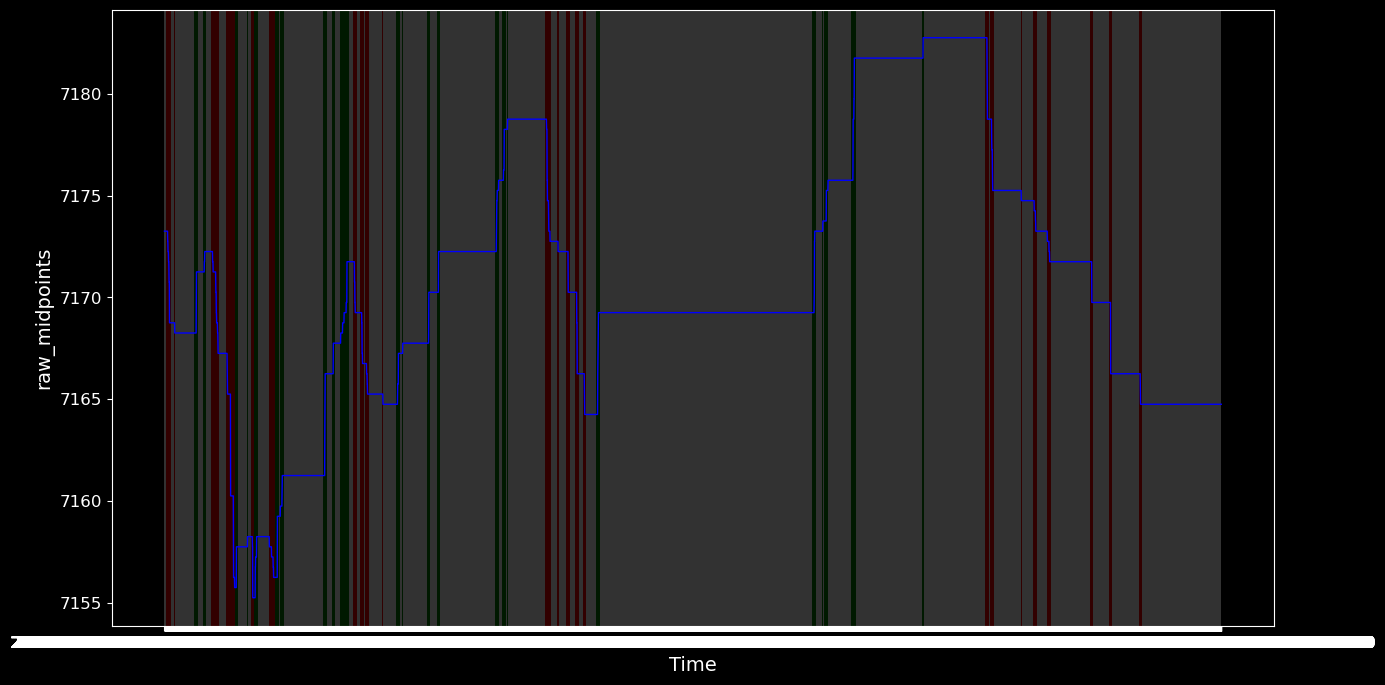

In [7]:
plot_timeseries(normalized_dfs_red.iloc[:10000].dropna(), 'raw_midpoints')